   Level  Year of Experience  Programming Language  Language  Lang  Location
0    1.0                 3.0                     5         1   0.0         0
1    1.0                 3.0                     0         1   1.0         1
2    3.0                 3.0                     0         0   0.0         0
3    2.0                 4.0                     0         0   0.0         0
4    1.0                 4.0                     8         0   0.0         0


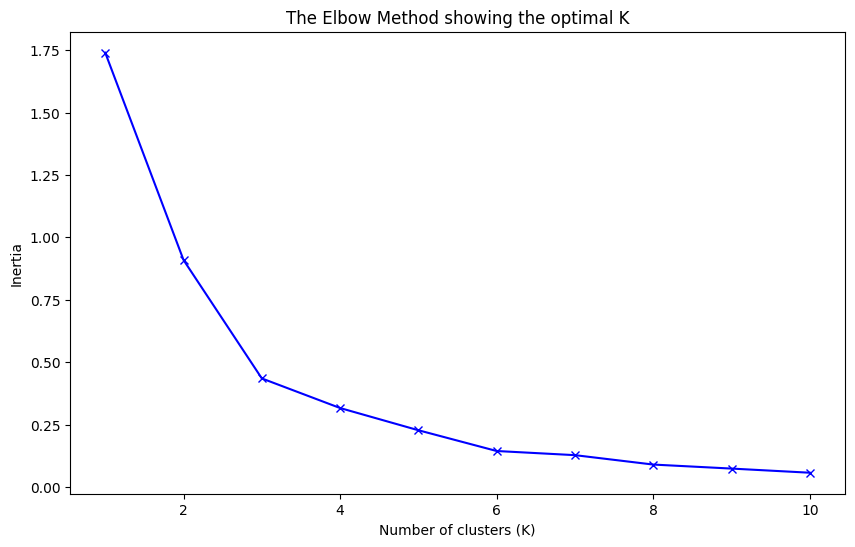

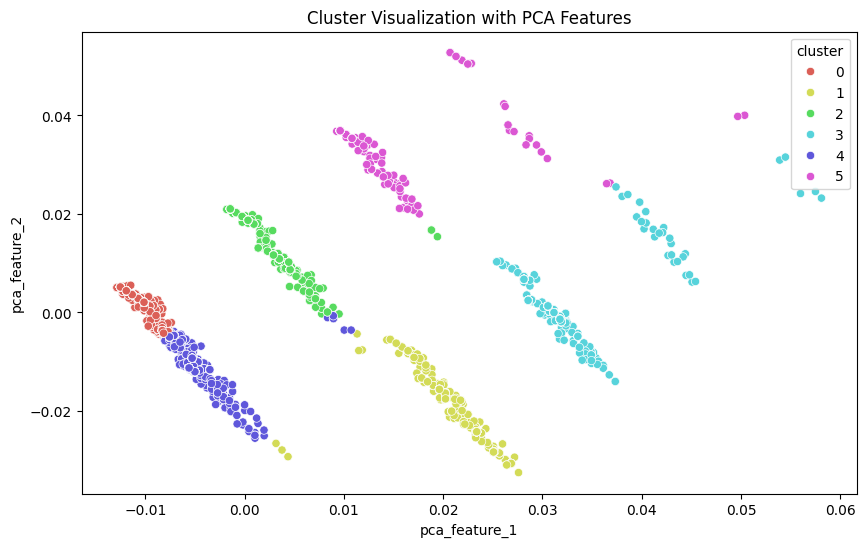

Sample points from cluster 0:
      Level  Year of Experience  Programming Language  Language  Lang  \
2       3.0                 3.0                     0         0   0.0   
3       2.0                 4.0                     0         0   0.0   
7       1.0                 3.0                     0         0   0.0   
13      1.0                 0.0                     0         0   0.0   
14      1.0                 3.0                     5         0   0.0   
...     ...                 ...                   ...       ...   ...   
4960    1.0                 1.0                     0         0   0.0   
4962    1.0                 2.0                     0         0   0.0   
4964    1.0                 1.0                     6         0   0.0   
4967    1.0                 2.0                     0         1   0.0   
4969    1.0                 1.0                     0         0   0.0   

      Location  cluster      Salary  
2            0        0  22500000.0  
3            0   

In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Nạp dữ liệu
jobs = pd.read_csv("../data/clean combined.csv")
jobs = jobs.drop(columns=['Sex', 'Contract Type'])



# Lưu lại cột Salary trước khi chuẩn hóa và phân cụm
salaries = jobs['Salary']
jobs = jobs.drop(columns=['Salary'])

# Mã hóa Ordinal
level_encoder = OrdinalEncoder(categories=[['Thực tập sinh', 'Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc']])
jobs['Level'] = level_encoder.fit_transform(jobs[['Level']])

lang_encoder = OrdinalEncoder(categories=[['vi', 'en']])
jobs['Lang'] = lang_encoder.fit_transform(jobs[['Lang']])

experience_encoder = OrdinalEncoder(categories=[['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm']])
jobs['Year of Experience'] = experience_encoder.fit_transform(jobs[['Year of Experience']])

# Mã hóa Label cho các biến mới
le = LabelEncoder()
for col in ['Programming Language', 'Location', 'Language']:
    jobs[col] = le.fit_transform(jobs[col])
    
print(jobs.head())
# Lưu lại dữ liệu gốc trước khi chuẩn hóa
jobs_original = jobs.copy()

# Chuẩn hóa dữ liệu
data = pd.DataFrame(normalize(jobs, axis=0), columns=jobs.columns)

# PCA
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data)

# Tìm K tốt nhất bằng phương pháp Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_transformed)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

# Sử dụng K tốt nhất từ biểu đồ Elbow
optimal_k = 6  # Bạn có thể thay đổi giá trị này dựa trên kết quả từ biểu đồ Elbow
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
pred = kmeans.fit_predict(data_transformed)

# Trực quan hóa các cụm
data_pca = pd.DataFrame(data_transformed, columns=['pca_feature_1', 'pca_feature_2'])
data_pca['cluster'] = pred
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_pca, x='pca_feature_1', y='pca_feature_2', hue='cluster', palette=sns.color_palette("hls", optimal_k), legend="full")
plt.title("Cluster Visualization with PCA Features")
plt.show()

# Thêm nhãn cụm và cột lương vào bản sao của dữ liệu gốc
jobs_original['cluster'] = pred
jobs_original['Salary'] = salaries

# Hiển thị và lưu mẫu dữ liệu từ mỗi cụm, bao gồm cả lương
for i in range(optimal_k):
    sample_points = jobs_original[jobs_original['cluster'] == i]
    print(f"Sample points from cluster {i}:")
    print(sample_points)
    sample_points.to_csv(f"cluster_{i}_data.csv", index=False)

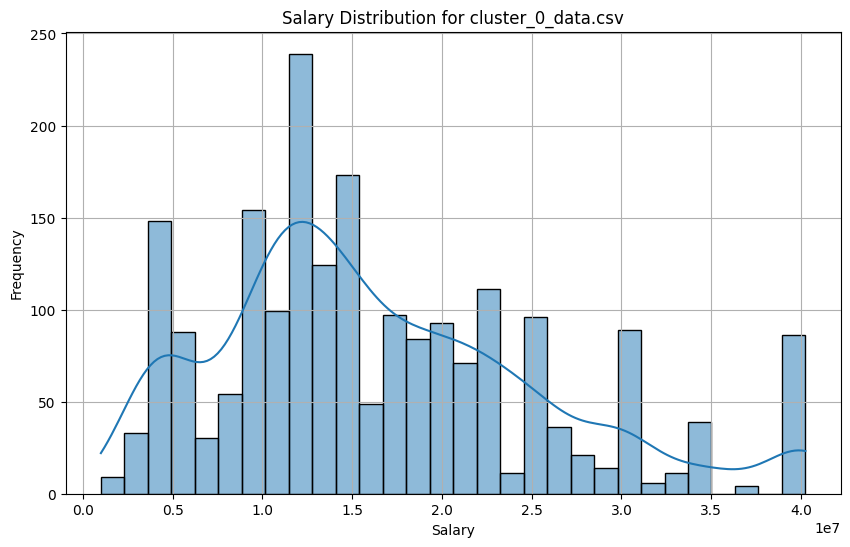

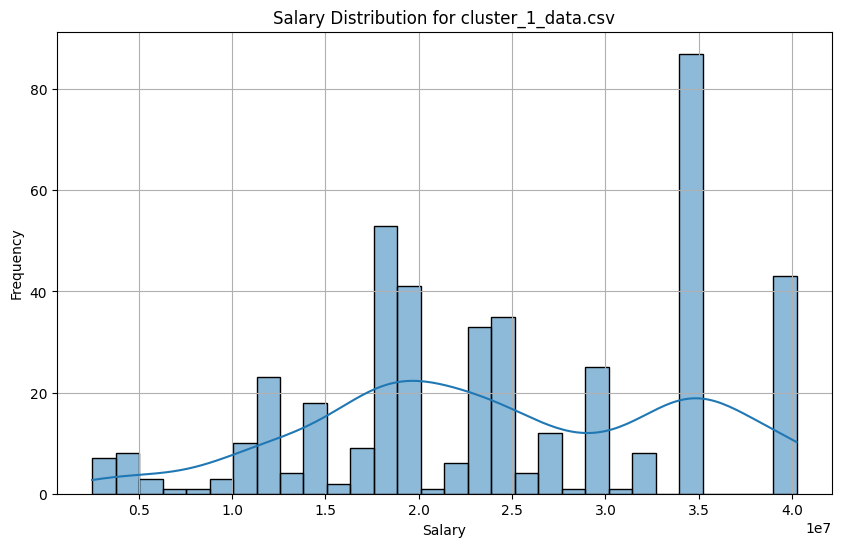

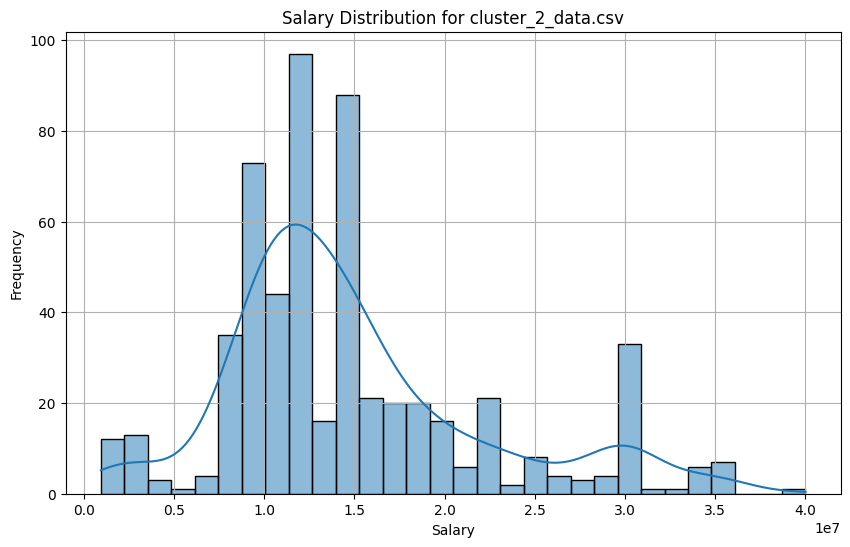

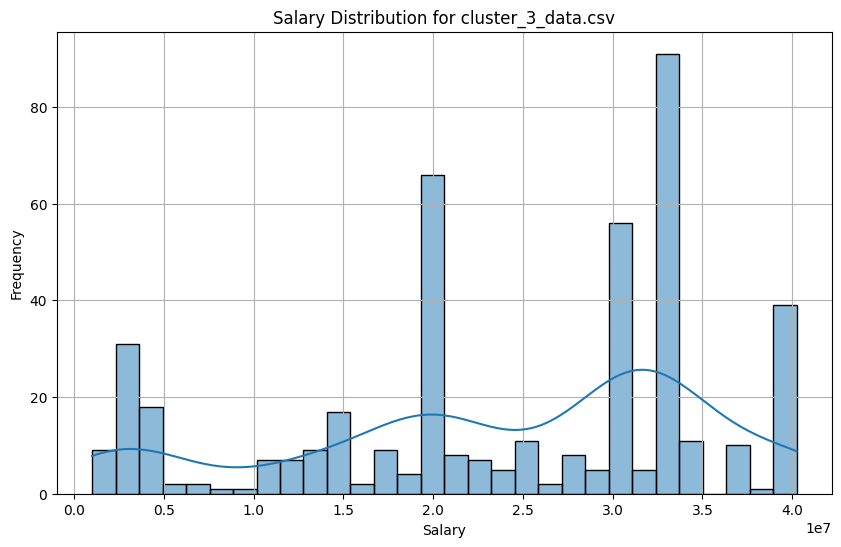

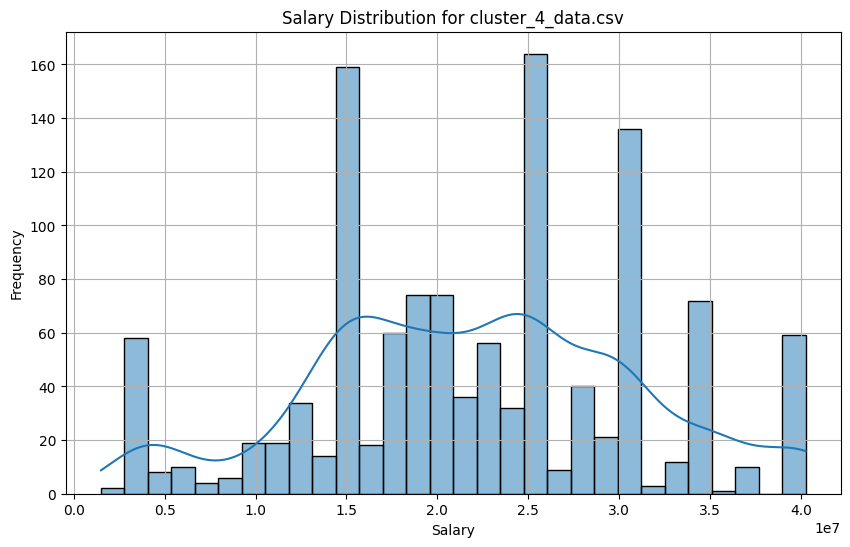

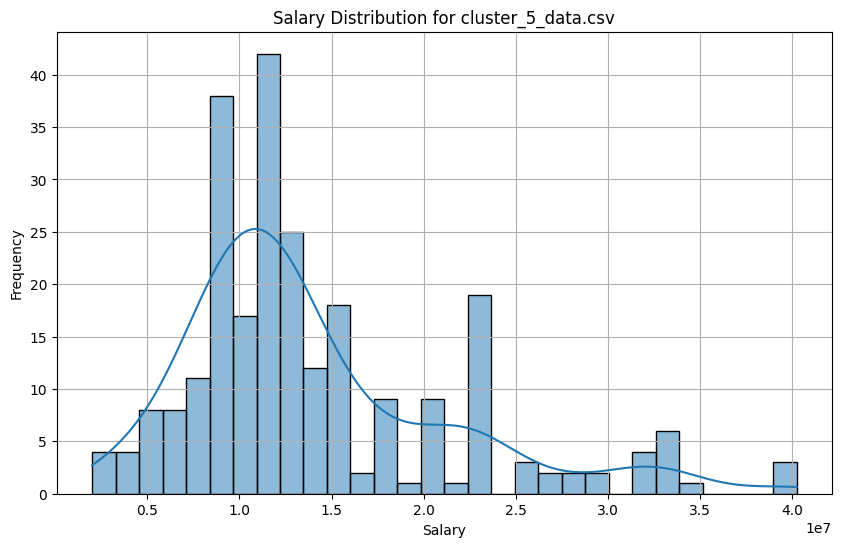

Thống kê đã được lưu vào 'clusters_statistics.csv'


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Danh sách các file CSV
file_paths = ['cluster_0_data.csv', 'cluster_1_data.csv', 'cluster_2_data.csv', 'cluster_3_data.csv', 'cluster_4_data.csv', 'cluster_5_data.csv']  # Thay thế bằng danh sách các file của bạn
# file_paths = ['cluster_0_data.csv', 'cluster_1_data.csv', 'cluster_2_data.csv']  # Thay thế bằng danh sách các file của bạn


# Hàm để vẽ biểu đồ phân phối lương và tìm khoảng tập trung lương nhiều nhất
def plot_salary_distribution(file_path):
    df = pd.read_csv(file_path)
    
    # Vẽ biểu đồ phân phối lương
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Salary'], kde=True, bins=30)
    plt.title(f'Salary Distribution for {file_path}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Tìm khoảng lương tập trung nhiều nhất
    salary_mode = df['Salary'].mode()[0]
    salary_range = (salary_mode - 2500000, salary_mode + 2500000)
    statistics = {
        'File': file_path,
        'Salary Range': salary_range
    }
    
    # Danh sách các cột cần tìm khoảng phổ biến nhất
    columns_to_check = ['Level', 'Year of Experience', 'Programming Language', 'Language', 'Lang', 'Location']
    
    # Tìm và lưu khoảng phổ biến nhất cho các cột còn lại
    for column in columns_to_check:
        if column in df.columns:
            if df[column].dtype in [np.int64, np.float64]:
                # Đối với các cột liên tục, tìm thùng chứa nhiều giá trị nhất
                counts, bin_edges = np.histogram(df[column], bins=10)
                max_bin_index = np.argmax(counts)
                mode_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])
            else:
                # Đối với các cột phân loại, tìm giá trị phổ biến nhất
                mode_value = df[column].mode()[0]
                mode_range = mode_value
            statistics[f'{column}'] = mode_range
        else:
            statistics[f'{column}'] = 'N/A'
    
    return statistics

# Danh sách để lưu các thống kê
all_statistics = []

# Vẽ và thu thập thông tin thống kê cho từng file
for file_path in file_paths:
    stats = plot_salary_distribution(file_path)
    all_statistics.append(stats)

# Tạo DataFrame từ danh sách các thống kê
stats_df = pd.DataFrame(all_statistics)

# Lưu DataFrame vào file CSV
stats_df.to_csv('clusters_statistics.csv', index=False)

print("Thống kê đã được lưu vào 'clusters_statistics.csv'")
